In [1]:
import pandas as pd
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
print("keys in the dataset are:\n{}".format(data.keys()))
print(len(data))

keys in the dataset are:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
303


In [3]:
X = data.drop('target',axis=1)
y = data['target']
print(X)
print(y)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train)
print(y_train)

training_accuracy =[]
testing_accuracy = []

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
124   39    0   2        94   199    0        1      179      0      0.0   
72    29    1   1       130   204    0        0      202      0      0.0   
15    50    0   2       120   219    0        1      158      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
163   38    1   2       138   175    0        1      173      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
124      2   0     2  
72       2   0     2  
15       1   0    

# KNN

prediction:
[0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1
 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1
 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1]
Training set score:
77.83
Testing set score:
62.64


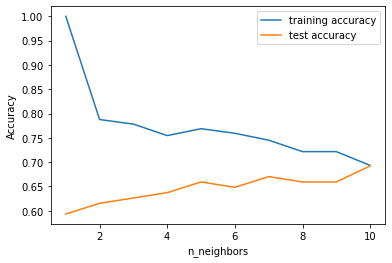

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

predict = knn.predict(X_test)
print("prediction:\n{}".format(predict))

print("Training set score:\n{:.2f}".format(knn.score(X_train,y_train)*100))

print("Testing set score:\n{:.2f}".format(knn.score(X_test,y_test)*100))


training_accuracy = []
test_accuracy = []
   # try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
     # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [6]:
import numpy as np

print(X_test.shape)
X_new = np.array([[57,0,1,130,236,0,0,174,0,0,1,1,2]])
print(X_new.shape)

predict1 = knn.predict(X_new)
print(predict1)


(91, 13)
(1, 13)
[1]


# Decision Tress

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train,y_train)

print("Training set score: {:.2f}".format(tree.score(X_train,y_train)*100))
print("Testing set score:{:.2f}".format(tree.score(X_test,y_test)*100))

Training set score: 100.00
Testing set score:73.63


In [8]:
X_new = np.array([[57,0,1,130,236,0,0,174,0,0,1,1,2]])

predtree = tree.predict(X_train)

print(predtree)

[1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0
 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0
 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1]


# SVM

In [20]:
from sklearn.svm import SVC

svm = SVC(C=100)

svm.fit(X_train,y_train)

print("Training set score: {:.2f}".format(svm.score(X_train,y_train)*100))

print("Testing set score: {:.2f}".format(svm.score(X_test,y_test)*100))


Training set score: 71.70
Testing set score: 76.92


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train,y_train)

print("Training set score:{:.2f}".format(log.score(X_train,y_train)*100))

print("Test data set score:{:.2f}".format(log.score(X_test,y_test)*100))



Training set score:86.79
Test data set score:81.32


/home/sandy/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# MinMax Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler   # makes dataset values between 0 and 1

scaler = MinMaxScaler()

scaler.fit(X_train)


MinMaxScaler()

In [23]:
X_train_scaled = scaler.transform(X_train)

print(X_train_scaled.shape)

X_test_scaled = scaler.transform(X_test)

print(X_test_scaled.shape)

(212, 13)
(91, 13)


# KNN with scaling

In [24]:
knn.fit(X_train_scaled,y_train)

print("Training set score:{:.2f}".format(knn.score(X_train_scaled,y_train)*100))

print("Test data set score:{:.2f}".format(knn.score(X_test_scaled,y_test)*100))


Training set score:88.21
Test data set score:76.92


# Decision Tree with scaling

In [25]:
tree.fit(X_train_scaled,y_train)

print("Training set score:{:.2f}".format(tree.score(X_train_scaled,y_train)*100))

print("Test data set score:{:.2f}".format(tree.score(X_test_scaled,y_test)*100))  

# scaling does not effect decision trees as they are not sensitive to the variance in the data.


Training set score:100.00
Test data set score:73.63


# SVM with scaling

In [26]:
svm.fit(X_train_scaled,y_train)

print("Training set score:{:.2f}".format(svm.score(X_train_scaled,y_train)*100))

print("Test data set score:{:.2f}".format(svm.score(X_test_scaled,y_test)*100))


Training set score:99.06
Test data set score:73.63


# Logistic Regression with scaling

In [28]:
log.fit(X_train_scaled,y_train)

print("Training set score:{:.2f}".format(log.score(X_train_scaled,y_train)*100))

print("Test data set score:{:.2f}".format(log.score(X_test_scaled,y_test)*100))

Training set score:84.91
Test data set score:80.22
